## Linear Regression - House prices

This first assignment has the scope to make you familiarize yourself with Python, apply what you have seen during the pre-course, work, and implement the first class of model we see during the course.

In this assignment, we want to **predict the sale price of a house** using its features. Besides the sale price, the dataset contains many features for each house (size, number of bathrooms, year of construction, etc.). 

To understand the relations that link the house features with its price, each group has to do the following: 

1. Select the target variable (Y) from the data - The Target name is **SalePrice**, and  select the following variables as predictors (X) from the Data: **GrLivArea**, **LotArea**, and **LotFrontage**.
2. Plot the scatter plot of each predictor (X) verus the target variable (Y) to see if there is a linear relation between the two variables.
3. Split the data into training and test sample
4. Estimate the parameters of the univariate regression using as predictor only the variable **LotArea**.
5. Use the prameters to fit the linear regression line and add it to the relevant scatter plot of point 3.
6. Compute the mean squared error and the R-squared of the univariate linear model using the test data.
7. Estimate the parameters of the multivariate regression using as predictor all the X selected at point 2, using only the training data.
8. Compute the mean squared error, and the R-squared of the multivariate linear model using the test data.
9. Which model has the lowest mean squared error and the better R-squared? Why?

In [1]:
# Load the packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
# import the data using pandas
house_data = pd.read_csv("../Data/House_price.csv", header = 0)
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data Manipulation

In this first assignment, since we have not seen already how to perform a little of data manipulation, which includes: dummy conversion, missing elimination or substitution, outlier elimination etc... We will clean the data for you so you can start to work with a "cleaned" data matrix.

**Data Manipulation** will be showed in detail on the first tutorial of the course this Thursday.


We modify the **house_data** as follow:

1. Eliminate all the object type data
2. Eliminate all the missings

In [3]:
# 1. Eliminate all the columns of type the object type data
house_data = house_data.select_dtypes(include=['int64', 'float64'])

# 2. Eliminate missing values
print('`house_data` containes %d missing values' %(house_data.isnull().sum().sum()))
house_data.dropna(inplace=True)

print("")
# 3. Check presence of misisng
print('After the missing elimination, there are %d missing in the data.' %(house_data.isnull().sum().sum()))

`house_data` containes 348 missing values

After the missing elimination, there are 0 missing in the data.


### 1. Select the Target variable (Y) and the predictors (X).

In [4]:
Y = house_data['SalePrice']
X = house_data[['GrLivArea', 'LotArea', 'LotFrontage']]
print(Y)
print(X)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1121, dtype: int64
      GrLivArea  LotArea  LotFrontage
0          1710     8450         65.0
1          1262     9600         80.0
2          1786    11250         68.0
3          1717     9550         60.0
4          2198    14260         84.0
...         ...      ...          ...
1455       1647     7917         62.0
1456       2073    13175         85.0
1457       2340     9042         66.0
1458       1078     9717         68.0
1459       1256     9937         75.0

[1121 rows x 3 columns]


###  2. Plot the scatter plot of each predictor (X) verus the target variable (Y)

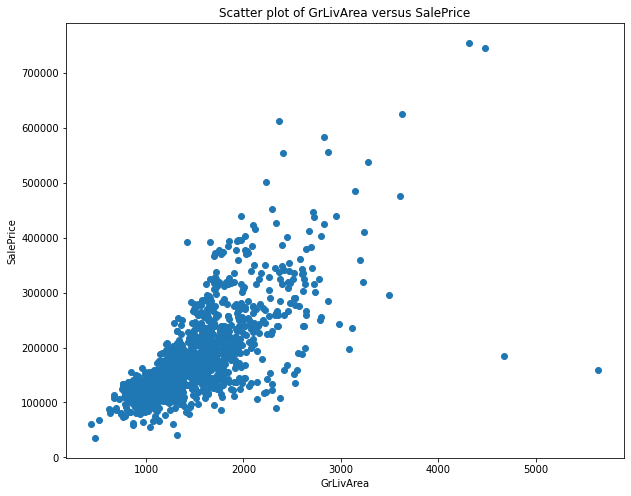

In [5]:
# GrLivArea
X1 = X['GrLivArea']
plt.figure(figsize=(10,8))
plt.scatter(X1, Y)
plt.title('Scatter plot of GrLivArea versus SalePrice')
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

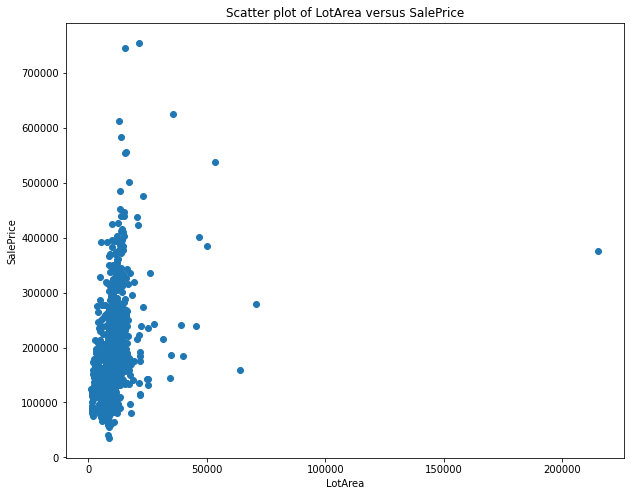

In [6]:
# LotArea
X2 = X['LotArea']
plt.figure(figsize=(10,8))
plt.scatter(X2, Y)
plt.title('Scatter plot of LotArea versus SalePrice')
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.show()

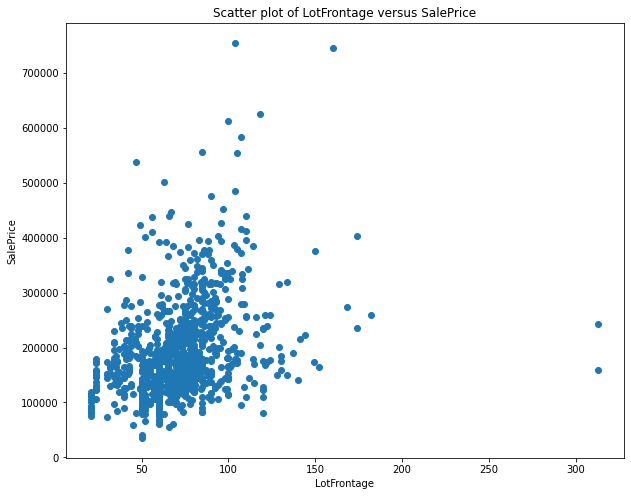

In [7]:
# LotFrontage
X3 = X['LotFrontage']
plt.figure(figsize=(10,8))
plt.scatter(X3, Y)
plt.title('Scatter plot of LotFrontage versus SalePrice')
plt.xlabel("LotFrontage")
plt.ylabel("SalePrice")
plt.show()

### 3. Split the data into training and test sample

In [8]:
#Split the data into training(70%) and test(30%)
df_training, df_test = train_test_split(house_data, train_size = 0.7, test_size = 0.3)
print(len(df_training))
print(len(df_test))


784
337


### 4. Estimate&nbsp;the&nbsp;parameters&nbsp;of&nbsp;the&nbsp;univariate&nbsp;regression&nbsp;using&nbsp;as&nbsp;predictor&nbsp;only&nbsp;the&nbsp;variable&nbsp;LotArea.

In [9]:
# Define X and Y for the univariate regression
lot_area_training = df_training['LotArea'] # X-axis
sale_price_training = df_training['SalePrice'] # Y-axis

# Perform regression to estimate parameters
lr = LinearRegression().fit(lot_area_training.values.reshape(-1,1), sale_price_training.values.reshape(-1,1))
reg = ["intercept", "Lot_Area"]
coef = pd.DataFrame([lr.intercept_,lr.coef_[0]],reg, columns = ['coefficients'])
print(coef)

            coefficients
intercept  158245.257977
Lot_Area        2.663405


### 5. Use the parameters to fit the linear regression line and add it to the relevant scatter plot of point 3

R-Squared(Training Data) :  0.07779228480213773
Mean Squared Error(Training Data):  79333.66064385648


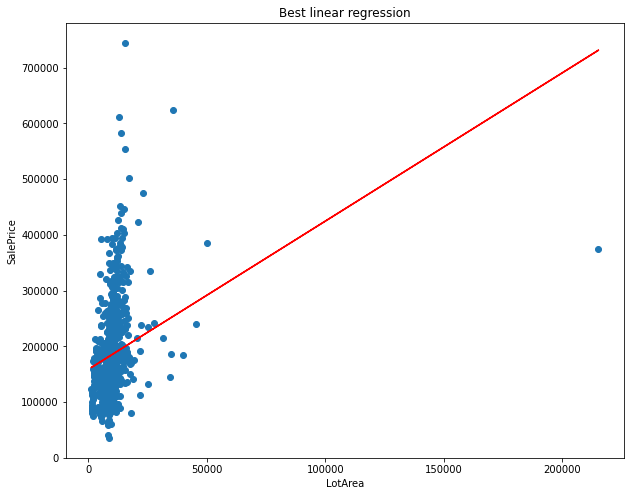

In [10]:
# Calculate R-Square and MSE
y_pred = lr.predict(lot_area_training.values.reshape(-1,1))
rSquare = r2_score(sale_price_training.values.reshape(-1,1), y_pred)
mse_error = mean_squared_error(sale_price_training, y_pred)
print("R-Squared(Training Data) : ", rSquare)
print("Mean Squared Error(Training Data): ", np.sqrt(mse_error))

# Display the fitted line on top of the scatter plots
plt.figure(figsize=(10,8))
plt.scatter(lot_area_training, sale_price_training)
plt.plot(lot_area_training, y_pred, 'r')
plt.title('Best linear regression')
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.show() 

### 6. Compute the mean squared error and the R-squared of the univariate linear model using the test data

In [11]:
# Define X and (true) Y
lot_area_test = df_test['LotArea'] # X-axis
sale_price_test = df_test['SalePrice'] # True Y

# Calculate predicted Y (Y hat)
y_pred_hat = lr.predict(lot_area_test.values.reshape(-1,1))

# Compute R-Square and MSE
rSquare_test_uni = r2_score(sale_price_test.values.reshape(-1,1), y_pred_hat)
mse_error_test_uni = mean_squared_error(sale_price_test, y_pred_hat)
print("R-Squared(Test Data) : ", rSquare_test_uni)
print("Mean Squared Error(Test Data): ", np.sqrt(mse_error_test_uni))

R-Squared(Test Data) :  0.11208044953240337
Mean Squared Error(Test Data):  78917.62131668716


### 7. Estimate the parameters of the multivariate regression using as predictor all the X selected at point 2, using only the training data

In [12]:
# Define X and Y for the multivariate regression
sale_price_training = df_training['SalePrice'] # X-axis
predictors_training = df_training[['GrLivArea', 'LotArea', 'LotFrontage']] # Y-axis

# Perform regression to estimate parameters
lr_mul = LinearRegression().fit(predictors_training, sale_price_training.values.reshape(-1,1))
reg2 = ["intercept",'GrLivArea', 'LotArea', 'LotFrontage']
coef2 = pd.DataFrame(np.transpose(np.hstack(([lr_mul.intercept_],lr_mul.coef_))),index = reg2, columns = ['coefficients'])
print(coef2)

# Compute R-Square and MSE
y_pred_training_mul = lr_mul.predict(predictors_training)
rSquare_training_mul = r2_score(sale_price_training, y_pred_training_mul)
mse_error_training_mul = mean_squared_error(sale_price_training, y_pred_training_mul)
print("R-Squared(Training Data) : ", rSquare_training_mul)
print("Mean Squared Error(Training Data): ", np.sqrt(mse_error_training_mul))



             coefficients
intercept    -6759.126545
GrLivArea      104.206691
LotArea          0.681488
LotFrontage    361.897496
R-Squared(Training Data) :  0.5202000413617691
Mean Squared Error(Training Data):  57223.342450984186


### 3. Compute the mean squared error, and the R-squared of the multivariate linear model using the test data

In [13]:
# Define X and (true) Y
predictors_test = df_test[['GrLivArea', 'LotArea', 'LotFrontage']] # X-axis
sale_price_test = df_test['SalePrice'] # True Y

y_pred_mul_hat = lr_mul.predict(predictors_test)
rSquare_test_mul = r2_score(sale_price_test, y_pred_mul_hat)
mse_error_test_mul = mean_squared_error(sale_price_test, y_pred_mul_hat)
print("R-Squared(Test Data) : ", rSquare_test_mul)
print("Mean Squared Error(Test Data): ", np.sqrt(mse_error_test_mul))

R-Squared(Test Data) :  0.4676014785665973
Mean Squared Error(Test Data):  61109.05920317725


### 9. Which model has the lowest mean squared error and the better R-squared? Why?

In [14]:
# R-squared
print("Univariate R2 : ", rSquare_test_uni)
print("Multivariate R2 : ", rSquare_test_mul)
print('Improvement', round((rSquare_test_mul - rSquare_test_uni) / rSquare_test_uni,2))

# MSE
print("Univariate MSE(Test Data): ", np.sqrt(mse_error_test_uni))
print("Multivariate MSE(Test Data): ", np.sqrt(mse_error_test_mul))
print('Improvement', round((np.sqrt(mse_error_test_mul) - np.sqrt(mse_error_test_uni)) / np.sqrt(mse_error_test_uni),2))


Univariate R2 :  0.11208044953240337
Multivariate R2 :  0.4676014785665973
Improvement 3.17
Univariate MSE(Test Data):  78917.62131668716
Multivariate MSE(Test Data):  61109.05920317725
Improvement -0.23


### Analysis
The multivariate model has the lowest mean squared error and the better R-squared.
The reason behind this is that multiple predictors provide a better-fitted regression model than a simple predictor given that the analysis is performed on the same sample data.



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5cba99b1-0985-46f8-a887-709fbaf6b05e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>